# Introduction
* Phan tich cac yeu to anh huong den price tu bang du lieu MELBOURNE_HOUSE
* Yeu cau:
    - Ket luan va tra loi cac cau hoi:
    - 1. Examine and explore data (visualization, interactions among features)
    - 2. Apply the model for prediction with holdout and cross validation
    - 3. Using PCA, apply the model with holdout and cross validation
    - 4. Visualize the residue and homoscedasticity
    - 5. Tune the model if necessary
    - 6. Write up analysis for each section (for example, explain why the model is overfitting, explain why applying PCA is better, etc.)
    - 7. Include conclusions for summary

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
# data = pd.read_csv('D:/machine learning/project/melbourne-housing-market/Melbourne_housing_FULL.csv')
data = pd.read_csv('D:/machine learning/project/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv')
data.shape

(63023, 13)

# 1. Examine and explore data (visualization, interactions among features)

# 1.1. EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
Suburb           63023 non-null object
Address          63023 non-null object
Rooms            63023 non-null int64
Type             63023 non-null object
Price            48433 non-null float64
Method           63023 non-null object
SellerG          63023 non-null object
Date             63023 non-null object
Postcode         63023 non-null int64
Regionname       63023 non-null object
Propertycount    63023 non-null int64
Distance         63023 non-null float64
CouncilArea      63023 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


- Bang du lieu co 63023 dong va 13 cot. Co nhieu cot co the lien quan anh huong den Price nhu Rooms, Address, Suburb,...
- Trong bang chi co Price co nhieu missing value

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
data.describe(percentiles=[.1,.25,.50,.75,.95,.99])

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
10%,2.000000,4.800400e+05,3029.000000,2698.000000,4.300000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
95%,5.000000,2.100000e+06,3206.000000,15510.000000,26.500000
99%,5.000000,3.200000e+06,3756.000000,21650.000000,38.000000


Tu bang nay ta co the thay co mot so cot co gia tri max bat thuong vi chenh lech rat nhieu so voi cac gia tri khac nhu Rooms, Price

# The target valuable: Distribution of Price

count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64


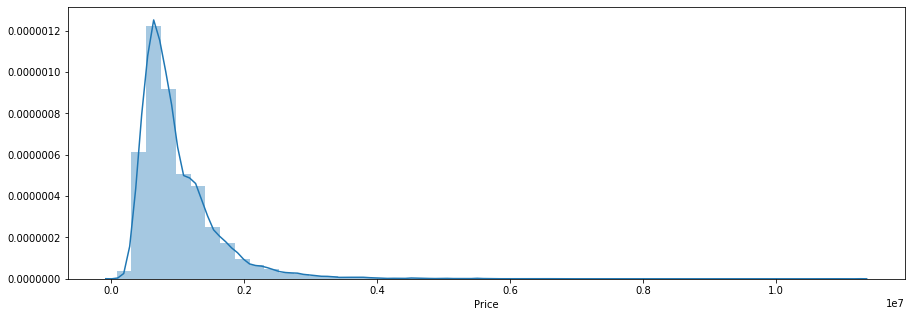

In [6]:
print(data['Price'].describe())
plt.figure(figsize=(15,5))
sns.distplot(data['Price'])

Nhin tu bieu do thi bien target Price khong phai la phan phoi chuan va co mot so gia tri outliers > 0.4

# Numerical and categorical features

In [7]:
num_feature = data.columns[data.dtypes != 'object']
category_feature = data.columns[data.dtypes == 'object']
print('Number of numerical features: ', len(num_feature))
print(num_feature)
print('Number of categorical features: ', len(category_feature))
print(category_feature)

Number of numerical features:  5
Index(['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance'], dtype='object')
Number of categorical features:  8
Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname',
       'CouncilArea'],
      dtype='object')


In [8]:
data[num_feature].head()

,Rooms,Price,Postcode,Propertycount,Distance
0,3,1490000.0,3067,4019,3.0
1,3,1220000.0,3067,4019,3.0
2,3,1420000.0,3067,4019,3.0
3,3,1515000.0,3040,1543,7.5
4,2,670000.0,3042,3464,10.4


In [9]:
data[num_feature].describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [10]:
data[category_feature].head()

,Suburb,Address,Type,Method,SellerG,Date,Regionname,CouncilArea
0,Abbotsford,49 Lithgow St,h,S,Jellis,1/04/2017,Northern Metropolitan,Yarra City Council
1,Abbotsford,59A Turner St,h,S,Marshall,1/04/2017,Northern Metropolitan,Yarra City Council
2,Abbotsford,119B Yarra St,h,S,Nelson,1/04/2017,Northern Metropolitan,Yarra City Council
3,Aberfeldie,68 Vida St,h,S,Barry,1/04/2017,Western Metropolitan,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,h,S,Nelson,1/04/2017,Western Metropolitan,Moonee Valley City Council


In [11]:
data[category_feature].describe()

,Suburb,Address,Type,Method,SellerG,Date,Regionname,CouncilArea
count,63023,63023,63023,63023,63023,63023,63023,63023
unique,380,57754,3,9,476,112,8,34
top,Reservoir,52 Station St,h,S,Barry,24/03/2018,Southern Metropolitan,Boroondara City Council
freq,1241,7,45053,34063,6894,1144,17559,5132


# Ve bieu do phan phoi cac numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017455B93438>,
      dtype=object)

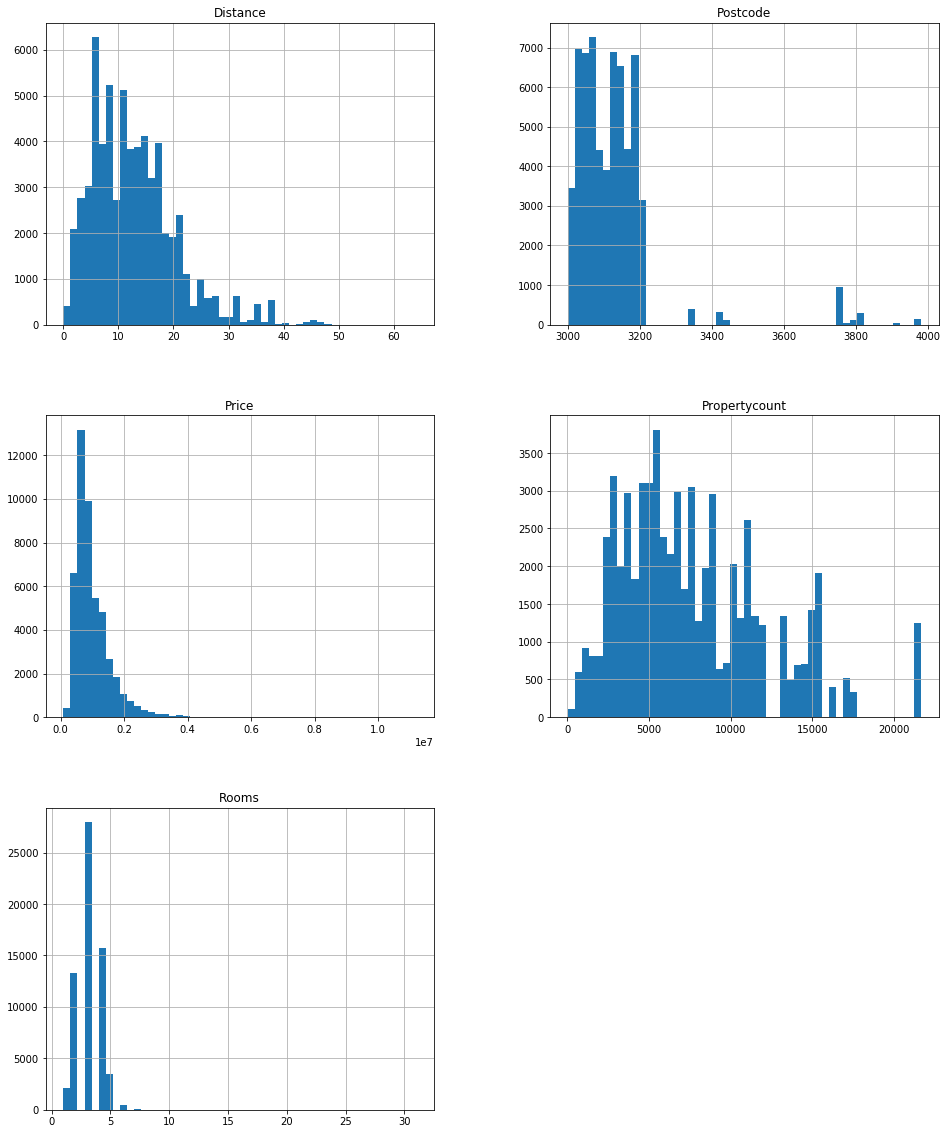

In [12]:
data.hist(figsize=(16, 20), bins=50)

# Kiem tra missing values

In [13]:
total = data.isnull().sum()
percent = data.isnull().sum()/len(data)*100
missing_data = pd.concat([total,percent], axis=1,keys=['Total', 'Percent'])
missing_data

,Total,Percent
Suburb,0,0.000000
Address,0,0.000000
Rooms,0,0.000000
Type,0,0.000000
Price,14590,23.150278
Method,0,0.000000
SellerG,0,0.000000
Date,0,0.000000
Postcode,0,0.000000
Regionname,0,0.000000


In [14]:
#xoa cac feature co missing value > 30% va lay cac feature con lai
data_trans = data[[column for column in data if data[column].count()/len(data) > 0.7]]
total = data_trans.isnull().sum()
percent = data_trans.isnull().sum()/len(data_trans)*100
missing_data = pd.concat([total,percent], axis=1,keys=['Total', 'Percent'])
missing_data

,Total,Percent
Suburb,0,0.000000
Address,0,0.000000
Rooms,0,0.000000
Type,0,0.000000
Price,14590,23.150278
Method,0,0.000000
SellerG,0,0.000000
Date,0,0.000000
Postcode,0,0.000000
Regionname,0,0.000000


In [15]:
#Luc nay neu chon phuong phap xoa missing value thi so luong gia tri moi feature se giam hon 15%
#Do do chon phuong phap fill missing value = mean cho cac numerical features va = None cho cac categorical features
# for col in category_feature:
#     data_trans[col].fillna('None', inplace=True)

In [16]:
#Luc nay neu chon phuong phap xoa missing value thi so luong gia tri moi feature se giam hon 15%
#Do do chon phuong phap fill missing value = mean cho cac numerical features
data_trans['Price'].fillna(data_trans['Price'].mean(), inplace=True)
# data_trans = data_trans.dropna()
data_num = data_trans.select_dtypes(include = ['float64', 'int64'])

In [17]:
data_trans.isnull().sum().sum()

0

# Relation of numerical features to target(Price)

In [18]:
num_feature = [c for c in num_feature if c in data_trans.columns]
# num_feature.remove('Price')
num_feature

['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance']

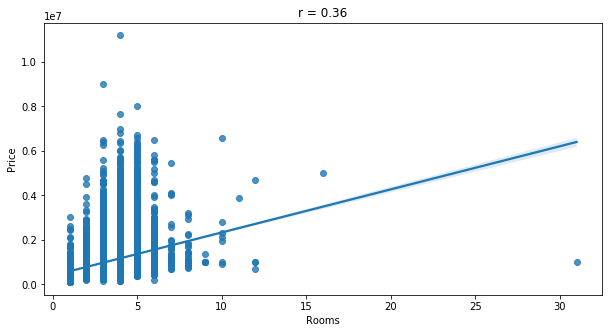

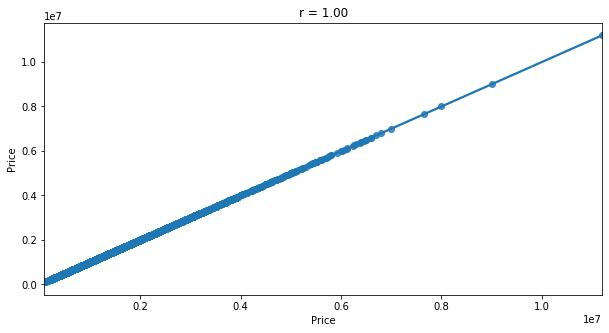

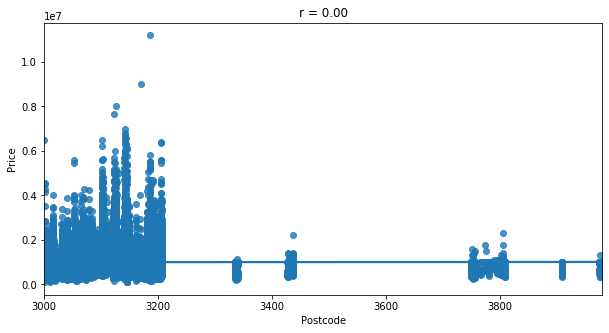

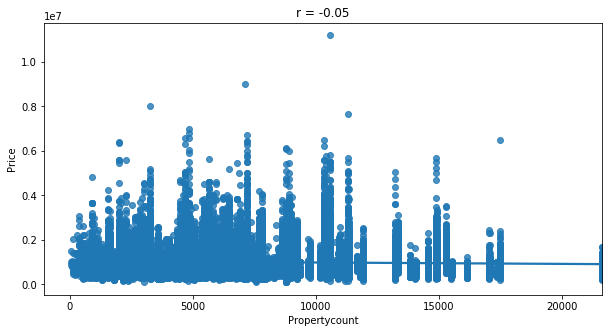

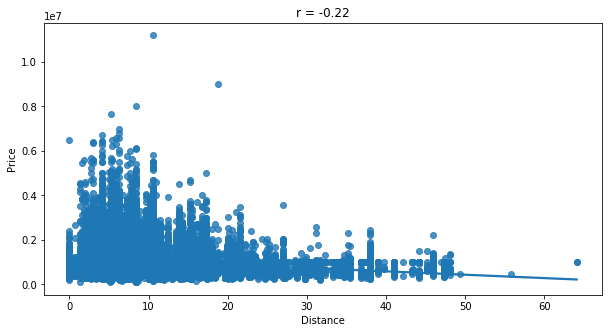

In [19]:
for i in num_feature:
    plt.figure(figsize=(10,5))
    st = stats.pearsonr(data_trans[i], data_trans['Price'])     
    plt.title('r = '+ "{0:.2f}".format(st[0]))
    sns.regplot(data_trans[i], data_trans['Price'])

- Tu cac bieu do tren ta thay rang cac he so correlation deu rat thap <=0.4
- Cac feature nhu postcode va propertycount co he so gan nhu bang = 0

# Relation of Categorical features to Price

In [20]:
# xem cac gia tri cua cac features
category_feature = [c for c in category_feature if c in data_trans.columns]
for catg in category_feature:
    print(data_trans[catg].value_counts())
    print('#'*50)

Reservoir            1241
Bentleigh East        845
Mount Waverley        831
Richmond              822
Glen Waverley         819
Craigieburn           783
Preston               699
Kew                   668
Glen Iris             662
Brunswick             644
Northcote             613
South Yarra           603
Brighton              602
Hawthorn              601
Balwyn North          595
Coburg                592
Camberwell            573
Glenroy               570
Cheltenham            569
Essendon              568
Brighton East         559
Bundoora              558
Mill Park             554
Pascoe Vale           529
Epping                511
St Kilda              507
Port Melbourne        506
Malvern East          505
Doncaster East        492
Hoppers Crossing      489
                     ... 
Panton Hill             2
Seville                 2
Woori Yallock           2
Belgrave                2
Kilsyth South           2
Chintin                 2
Mount Dandenong         2
Avonsleigh  

Phan loai cac categorical features

- Cac feature nhu Suburb, Address, CouncilArea, Regionname deu chi vi tri dia ly cua khu vuc cua ngoi nha.
- Vi so luong value cua cac feature Suburb, Address, CouncilArea rat nhieu nen ta se gom lai theo khu vuc de de visualize va khao sat anh huong cua khu vuc den Price
- Trong cac feature tren ta chon Regioname lam category dai dien khu vuc de khao sat

In [21]:
data_trans = data_trans.drop(['Suburb', 'Address', 'CouncilArea'], axis=1)

In [22]:
#xu ly Date
#Phan loai du lieu Date thanh cac quy cua nam voi cac gia tri 1,2,3,4,5,6,7,8,9,10,11,12 tuong ung voi quy 1,2,3,4 cua nam 2016
# quy 1,2,3,4 cua nam 2017, quy 1,2,3,4 cua nam 2018
data_trans['Date'] = pd.to_datetime(data_trans['Date'])
data_trans['quarter'] = data_trans['Date'].dt.quarter
data_trans['year'] = data_trans['Date'].dt.year

data_trans['Quarter_of_year'] = 1
data_trans.loc[((data_trans['quarter']==2) & (data_trans['year']==2016)), 'Quarter_of_year'] = 2
data_trans.loc[((data_trans['quarter']==3) & (data_trans['year']==2016)), 'Quarter_of_year'] = 3
data_trans.loc[((data_trans['quarter']==4) & (data_trans['year']==2016)), 'Quarter_of_year'] = 4
data_trans.loc[((data_trans['quarter']==1) & (data_trans['year']==2017)), 'Quarter_of_year'] = 5
data_trans.loc[((data_trans['quarter']==2) & (data_trans['year']==2017)), 'Quarter_of_year'] = 6
data_trans.loc[((data_trans['quarter']==3) & (data_trans['year']==2017)), 'Quarter_of_year'] = 7
data_trans.loc[((data_trans['quarter']==4) & (data_trans['year']==2017)), 'Quarter_of_year'] = 8
data_trans.loc[((data_trans['quarter']==1) & (data_trans['year']==2018)), 'Quarter_of_year'] = 9
data_trans.loc[((data_trans['quarter']==2) & (data_trans['year']==2018)), 'Quarter_of_year'] = 10
data_trans.loc[((data_trans['quarter']==3) & (data_trans['year']==2018)), 'Quarter_of_year'] = 11
data_trans.loc[((data_trans['quarter']==4) & (data_trans['year']==2018)), 'Quarter_of_year'] = 12

In [23]:
# xu ly SellerG
#phan loai SellerG co so luong nha ban duoc khac nhau, voi khoang phan loai la <1000, >1000, >2000, >3000, >4000, >6000.
# vi co the gia cua nguoi ban dua ra khac nhau co the anh huong so luong nha ho ban duoc
SellerG_frame = data_trans['SellerG'].value_counts().to_frame()
SellerG_lower1000 = list(SellerG_frame[SellerG_frame['SellerG'] < 1000].index)
SellerG_upper1000 = list(SellerG_frame[(SellerG_frame['SellerG'] >= 1000) & (SellerG_frame['SellerG'] < 2000)].index)
SellerG_upper2000 = list(SellerG_frame[(SellerG_frame['SellerG'] >= 2000) & (SellerG_frame['SellerG'] < 3000)].index)
SellerG_upper3000 = list(SellerG_frame[(SellerG_frame['SellerG'] >= 3000) & (SellerG_frame['SellerG'] < 4000)].index)
SellerG_upper4000 = list(SellerG_frame[(SellerG_frame['SellerG'] >= 4000) & (SellerG_frame['SellerG'] < 5000)].index)
SellerG_upper5000 = list(SellerG_frame[(SellerG_frame['SellerG'] >= 5000) & (SellerG_frame['SellerG'] < 6000)].index)
SellerG_upper6000 = list(SellerG_frame[SellerG_frame['SellerG'] >= 6000].index)
SellerG_cate = ['SellerG_lower1000','SellerG_upper1000','SellerG_upper2000','SellerG_upper3000','SellerG_upper4000','SellerG_upper5000','SellerG_upper6000']

data_trans['SellerG_level'] = 1
data_trans.loc[(data_trans['SellerG'].isin(SellerG_upper1000)), 'SellerG_level'] = 2
data_trans.loc[(data_trans['SellerG'].isin(SellerG_upper2000)), 'SellerG_level'] = 3
data_trans.loc[(data_trans['SellerG'].isin(SellerG_upper3000)), 'SellerG_level'] = 4
data_trans.loc[(data_trans['SellerG'].isin(SellerG_upper4000)), 'SellerG_level'] = 5
data_trans.loc[(data_trans['SellerG'].isin(SellerG_upper5000)), 'SellerG_level'] = 6
data_trans.loc[(data_trans['SellerG'].isin(SellerG_upper6000)), 'SellerG_level'] = 7


In [24]:
# cap nhap lai cac categorical features
category_feature = ['Type', 'Method', 'Regionname', 'SellerG_level', 'Quarter_of_year']

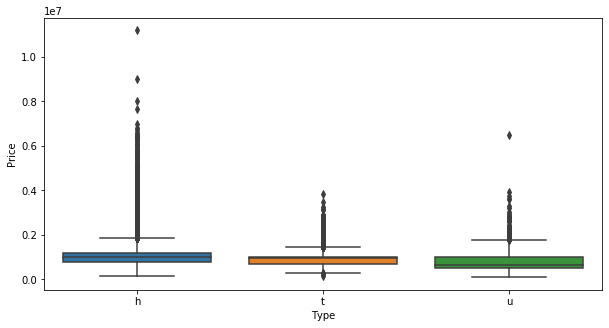

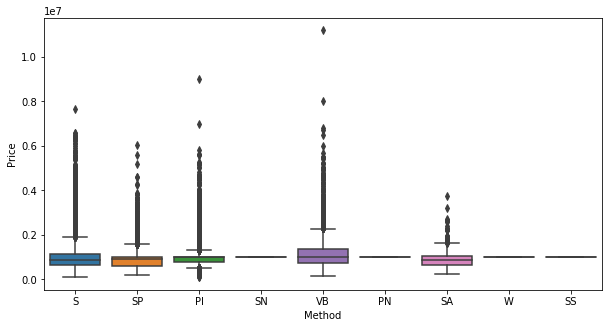

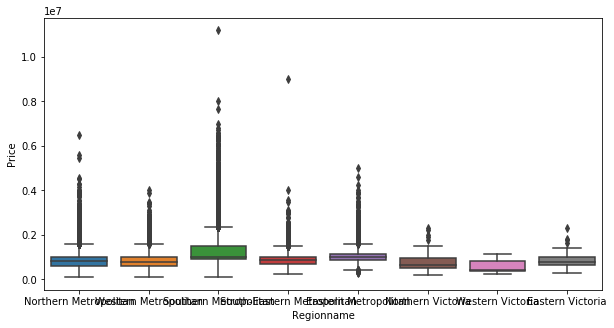

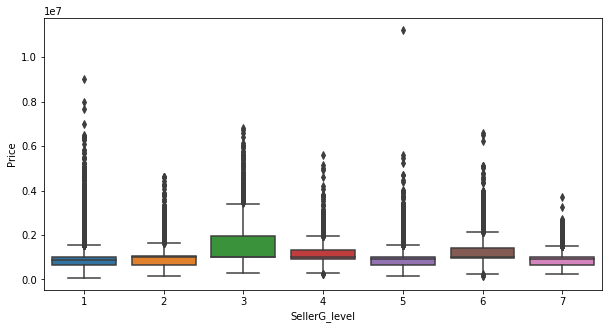

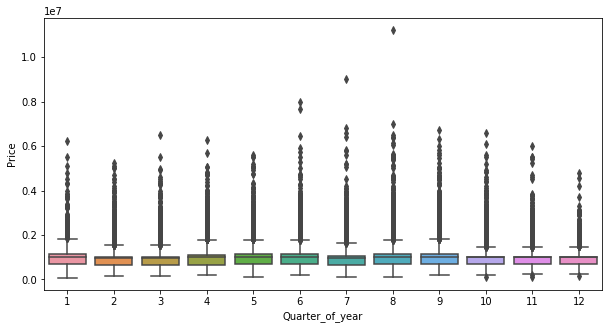

In [25]:
for i in category_feature:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=i, y='Price', data=data_trans)

# cap nhat lai cac feature cho tap du lieu moi de phuc vu testing va linear regression

In [26]:
dataset = data_trans.drop(['SellerG','quarter','year','Date'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 10 columns):
Rooms              63023 non-null int64
Type               63023 non-null object
Price              63023 non-null float64
Method             63023 non-null object
Postcode           63023 non-null int64
Regionname         63023 non-null object
Propertycount      63023 non-null int64
Distance           63023 non-null float64
Quarter_of_year    63023 non-null int64
SellerG_level      63023 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 4.8+ MB


In [27]:
# q1 = dataset.quantile(0.25)
# q3 = dataset.quantile(0.75)
# iqr = q3 - q1
# dataset = dataset[~((dataset < (q1 - 1.5 * iqr)) |(dataset > (q3 + 1.5 * iqr)))]
# dataset.info()

In [28]:
# dataset = dataset.dropna()
# dataset.isnull().sum()

In [29]:
dataset.describe(percentiles=[.1,.25,.50,.75,.95,.99])

,Rooms,Price,Postcode,Propertycount,Distance,Quarter_of_year,SellerG_level
count,63023.000000,6.302300e+04,63023.000000,63023.000000,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829,6.810514,3.363423
std,0.957551,5.202835e+05,125.626877,4424.423167,7.592015,2.992764,2.192854
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000,1.000000,1.000000
10%,2.000000,5.146000e+05,3029.000000,2698.000000,4.300000,2.000000,1.000000
25%,3.000000,6.770000e+05,3056.000000,4380.000000,7.000000,4.000000,1.000000
50%,3.000000,9.978982e+05,3107.000000,6795.000000,11.400000,7.000000,3.000000
75%,4.000000,1.065000e+06,3163.000000,10412.000000,16.700000,9.000000,5.000000
95%,5.000000,1.912950e+06,3206.000000,15510.000000,26.500000,11.000000,7.000000
99%,5.000000,3.000000e+06,3756.000000,21650.000000,38.000000,12.000000,7.000000


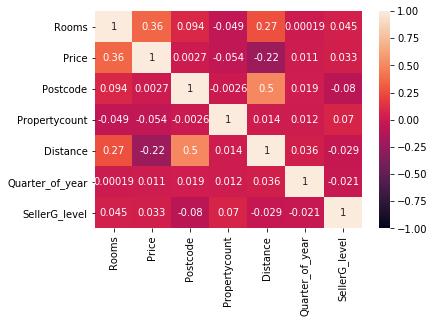

In [30]:
sns.heatmap(dataset.corr(), vmax=1.0, vmin=-1.0, annot=True)

# 1.2. Testing

In [31]:
dataset.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Postcode', 'Regionname',
       'Propertycount', 'Distance', 'Quarter_of_year', 'SellerG_level'],
      dtype='object')

In [32]:
percent_sample = 0.5
#testing Rooms
f, p = f_oneway(dataset[dataset['Rooms']==1]['Price'].sample(frac=percent_sample),
                dataset[dataset['Rooms']==2]['Price'].sample(frac=percent_sample),
                dataset[dataset['Rooms']==3]['Price'].sample(frac=percent_sample),
                dataset[dataset['Rooms']==4]['Price'].sample(frac=percent_sample),
                dataset[dataset['Rooms']==5]['Price'].sample(frac=percent_sample),
                dataset[dataset['Rooms']==6]['Price'].sample(frac=percent_sample),
                dataset[dataset['Rooms']>=7]['Price'].sample(frac=percent_sample))
if p < 0.05:
    print('Reject H0, Rooms la Key factor cua Price')
else:
    print('Accept H0, Rooms khong phai la Key factor cua Price')

Reject H0, Rooms la Key factor cua Price


In [33]:
#testing Type
f, p = f_oneway(dataset[dataset['Type']=='h']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Type']=='u']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Type']=='t']['Price'].sample(frac=percent_sample))
if p < 0.05:
    print('Reject H0, Type la Key factor cua Price')
else:
    print('Accept H0, Type khong phai la Key factor cua Price')

Reject H0, Type la Key factor cua Price


In [34]:
# dataset['Method'].value_counts()
#test Method
f, p = f_oneway(dataset[dataset['Method']=='S']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Method']=='PI']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Method']=='SP']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Method']=='VB']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Method']=='SN']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Method']=='PN']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Method']=='W']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Method']=='SA']['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Method']=='SS']['Price'].sample(frac=percent_sample))
if p < 0.05:
    print('Reject H0, Method la Key factor cua Price')
else:
    print('Accept H0, Method khong phai la Key factor cua Price')

Reject H0, Method la Key factor cua Price


In [35]:
#testing Postcode
Postcode_upper0 = data[(data['Postcode']>=0) & (data['Postcode']<3200)].sample(frac=percent_sample)
Postcode_upper2 = data[(data['Postcode']>=3200) & (data['Postcode']<3400)].sample(frac=percent_sample)
Postcode_upper4 = data[(data['Postcode']>=3400) & (data['Postcode']<3600)].sample(frac=percent_sample)
Postcode_upper6 = data[(data['Postcode']>=3600) & (data['Postcode']<3800)].sample(frac=percent_sample)
Postcode_upper8 = data[data['Postcode']>=3800].sample(frac=percent_sample)
f, p = f_oneway(Postcode_upper0['Price'].sample(frac=percent_sample),
                Postcode_upper2['Price'].sample(frac=percent_sample),
                Postcode_upper4['Price'].sample(frac=percent_sample),
                Postcode_upper6['Price'].sample(frac=percent_sample),
                Postcode_upper8['Price'].sample(frac=percent_sample))
if p < 0.05:
    print('Reject H0, Postcode la Key factor cua Price')
else:
    print('Accept H0, Postcode khong phai la Key factor cua Price')

Accept H0, Postcode khong phai la Key factor cua Price


In [36]:
#testing Regionname
f, p = f_oneway(dataset[dataset['Regionname']=='Northern Metropolitan']['Price'].sample(frac=percent_sample),
                dataset[dataset['Regionname']=='Southern Metropolitan']['Price'].sample(frac=percent_sample),
                dataset[dataset['Regionname']=='Western Metropolitan']['Price'].sample(frac=percent_sample),
                dataset[dataset['Regionname']=='Eastern Metropolitan']['Price'].sample(frac=percent_sample),
                dataset[dataset['Regionname']=='South-Eastern Metropolitan']['Price'].sample(frac=percent_sample),
                dataset[dataset['Regionname']=='Eastern Victoria']['Price'].sample(frac=percent_sample),
                dataset[dataset['Regionname']=='Northern Victoria']['Price'].sample(frac=percent_sample))
if p < 0.05:
    print('Reject H0, Regionname la Key factor cua Price')
else:
    print('Accept H0, Regionname khong phai la Key factor cua Price')

Reject H0, Regionname la Key factor cua Price


In [37]:
# testing Propertycount
Propertycount_upper0 = dataset[(dataset['Propertycount']>=0) & (dataset['Propertycount']<5000)]
Propertycount_upper5 = dataset[(dataset['Propertycount']>=5000) & (dataset['Propertycount']<10000)].sample(frac=percent_sample)
Propertycount_upper10 = dataset[(dataset['Propertycount']>=10000) & (dataset['Propertycount']<15000)].sample(frac=percent_sample)
Propertycount_upper15 = dataset[(dataset['Propertycount']>=15000) & (dataset['Propertycount']<20000)].sample(frac=percent_sample)
Propertycount_upper20 = dataset[dataset['Propertycount']>=20000].sample(frac=percent_sample)
f, p = f_oneway(Propertycount_upper0['Price'].sample(frac=percent_sample),
                Propertycount_upper5['Price'].sample(frac=percent_sample),
                Propertycount_upper10['Price'].sample(frac=percent_sample),
                Propertycount_upper15['Price'].sample(frac=percent_sample),
                Propertycount_upper20['Price'].sample(frac=percent_sample))
if p < 0.05:
    print('Reject H0, Propertycount la Key factor cua Price')
else:
    print('Accept H0, Propertycount khong phai la Key factor cua Price')

Reject H0, Propertycount la Key factor cua Price


In [38]:
#testing Distance
Distance_upper0 = dataset[(dataset['Distance']>=0) & (dataset['Distance']<10)]
Distance_upper10 = dataset[(dataset['Distance']>=10) & (dataset['Distance']<20)].sample(frac=percent_sample)
Distance_upper20 = dataset[(dataset['Distance']>=20) & (dataset['Distance']<30)].sample(frac=percent_sample)
Distance_upper30 = dataset[(dataset['Distance']>=30) & (dataset['Distance']<40)].sample(frac=percent_sample)
Distance_upper40 = dataset[dataset['Distance']>=40].sample(frac=percent_sample)
f, p = f_oneway(Distance_upper0['Price'].sample(frac=percent_sample),
                Distance_upper10['Price'].sample(frac=percent_sample),
                Distance_upper20['Price'].sample(frac=percent_sample),
                Distance_upper30['Price'].sample(frac=percent_sample),
                Distance_upper40['Price'].sample(frac=percent_sample))
if p < 0.05:
    print('Reject H0, Distance la Key factor cua Price')
else:
    print('Accept H0, Distance khong phai la Key factor cua Price')

Reject H0, Distance la Key factor cua Price


In [39]:
#test Quarter_of_year
f, p = f_oneway(dataset[dataset['Quarter_of_year']==1]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==2]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==3]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==4]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==5]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==6]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==7]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==8]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==9]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==10]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==11]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['Quarter_of_year']==12]['Price'].sample(frac=percent_sample))
if p < 0.05:
    print('Reject H0, Quarter_of_year la Key factor cua Price')
else:
    print('Accept H0, Quarter_of_year khong phai la Key factor cua Price')

Reject H0, Quarter_of_year la Key factor cua Price


In [40]:
#testing SellerG_level
f, p = f_oneway(dataset[dataset['SellerG_level']==1]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['SellerG_level']==2]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['SellerG_level']==3]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['SellerG_level']==4]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['SellerG_level']==5]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['SellerG_level']==6]['Price'].sample(frac=percent_sample)
                ,dataset[dataset['SellerG_level']==7]['Price'].sample(frac=percent_sample))
if p < 0.05:
    print('Reject H0, SellerG_level la Key factor cua Price')
else:
    print('Accept H0, SellerG_level khong phai la Key factor cua Price')

Reject H0, SellerG_level la Key factor cua Price


# 2. Apply the model for prediction with holdout and cross validation

2.1 Holdout

In [41]:
# Split
# Create features variable 
X = dataset[['Rooms', 'Distance', 'Postcode', 'Propertycount']]
# X = dataset[['Rooms', 'Distance', 'Propertycount']]
# Create target variable
y = dataset['Price']

# # Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [42]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)

In [44]:
# Score It
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(y_test,y_pred))

MSE: 194250543871.8832


In [45]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.26183545094152894


# 3. Using PCA, apply the model with holdout and cross validation

- Step 1. Data Standardization
- Step 2: Covariance Matrix
- Step 3: Eigen Decomposition of Covariance Matrix
- Step 4: Projection Onto New Feature Space

Step 1. Data Standardization
- As PCA deals with variance maximization of two variables, it is important to have both variables on same scale.

In [46]:
from sklearn.preprocessing import StandardScaler
Xstd = StandardScaler().fit_transform(X)

Step 2: Covariance Matrix

In [47]:
print('Covariance matrix: \n', np.cov(Xstd.T))

Covariance matrix: 
 [[ 1.00001587  0.26829371  0.09366724 -0.04898611]
 [ 0.26829371  1.00001587  0.50027068  0.01404993]
 [ 0.09366724  0.50027068  1.00001587 -0.00255698]
 [-0.04898611  0.01404993 -0.00255698  1.00001587]]


Step 3: Eigen Decomposition of Covariance Matrix

In [48]:
cov_mat = np.cov(Xstd.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print('Eigen vectors \n',eigen_vectors)
print('\nEigen values \n',eigen_values)

Eigen vectors 
 [[ 0.39507221  0.25768603  0.80394607 -0.36219687]
 [ 0.6796338  -0.7263013  -0.06540762  0.07941131]
 [ 0.61779279  0.63559927 -0.42991253  0.1718163 ]
 [-0.01865226  0.04580275  0.40566953  0.9126809 ]]

Eigen values 
 [1.61034005 0.46614549 0.90338085 1.02019708]


Now, Making list of eigen values and vectors and sorting the list w.r.t eigen values (Descending order) where highest eigen values represent highest variation.

In [49]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs.sort()
pairs.reverse()

print('Eigen Values in descending order:')
for i in pairs:
    print(i[0])

Eigen Values in descending order:
1.6103400531764882
1.02019707959869
0.9033808458221937
0.4661454913020307


To check how much aech Principle component represent variation, let us find the cumulative sum of eigen values and plot them.

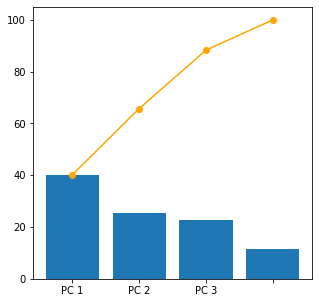

In [50]:
tot = sum(eigen_values)
var_per = [(i / tot)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_per = np.cumsum(var_per)

plt.figure(figsize=(5,5))
x=['PC %s' %i for i in range(1,len(var_per))]
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xticks(ind,x);
plt.plot(ind,cum_var_per,marker="o",color='orange')
plt.xticks(ind,x);

Plot shows that first component bears almost 35% of information, and first 3 components carry 85% information.

Step 4: Projection Onto New Feature Space

Reshaping eigen pairs to form a projection matrix, which is then multiplied by samples to transform data to new feature space

In [51]:
N=4
value=3
a = np.ndarray(shape = (N, 0))
for x in range(0,value):
    b = pairs[x][1].reshape(4,1)
    a = np.hstack((a,b))
print("Projection Matrix:\n",a)

Projection Matrix:
 [[ 0.39507221 -0.36219687  0.80394607]
 [ 0.6796338   0.07941131 -0.06540762]
 [ 0.61779279  0.1718163  -0.42991253]
 [-0.01865226  0.9126809   0.40566953]]


In [52]:
Y = Xstd.dot(a)
Y

array([[-1.18598885, -0.88207719, -0.13858924],
       [-1.18598885, -0.88207719, -0.13858924],
       [-1.18598885, -0.88207719, -0.13858924],
       ...,
       [ 0.36716715, -0.32788614, -0.11362894],
       [-0.06705893,  0.06808792,  0.09237587],
       [ 0.3454033 , -1.57901963,  0.52689217]])

In [53]:
# from sklearn.decomposition import PCA
# pca = PCA().fit(Xstd)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlim(0,7,1)
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')

In [54]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=3)
reduced_data = sklearn_pca.fit_transform(Xstd)

In [55]:
print(reduced_data)

[[-1.18598885  0.88207719 -0.13858924]
 [-1.18598885  0.88207719 -0.13858924]
 [-1.18598885  0.88207719 -0.13858924]
 ...
 [ 0.36716715  0.32788614 -0.11362894]
 [-0.06705893 -0.06808792  0.09237587]
 [ 0.3454033   1.57901963  0.52689217]]


In [56]:
# # Train, test, split
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(reduced_data,y, test_size = .20, random_state= 0)

In [57]:
# Create linear regression object
regressor_pca = LinearRegression()

# Fit model to training data
regressor_pca.fit(X_pca_train,y_pca_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Predict
# Predicting test set results
y_pca_pred = regressor_pca.predict(X_pca_test)

In [59]:
# Score It
print('MSE:',metrics.mean_squared_error(y_pca_test,y_pca_pred))

MSE: 230947323328.32867


In [60]:
print('R^2 =',metrics.explained_variance_score(y_pca_test,y_pca_pred))

R^2 = 0.12238830878240314


# 4. Visualize the residue

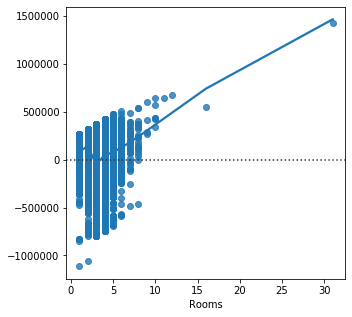

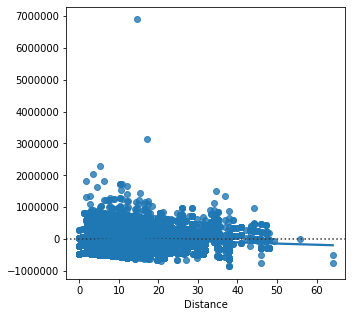

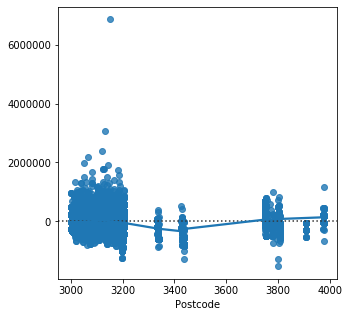

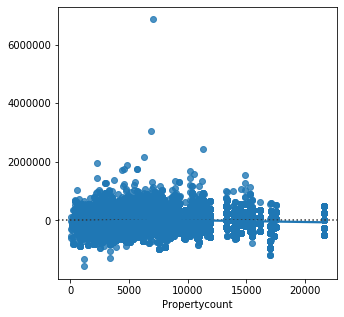

In [61]:
for i in X_train.columns:
    plt.figure(figsize=(5,5))
    sns.residplot(X_train[i], regressor.predict(X_train), lowess=True)

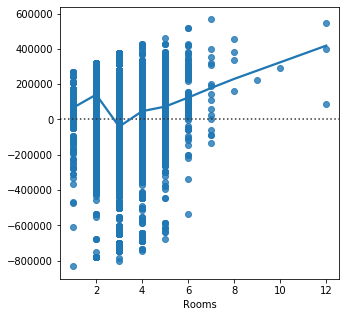

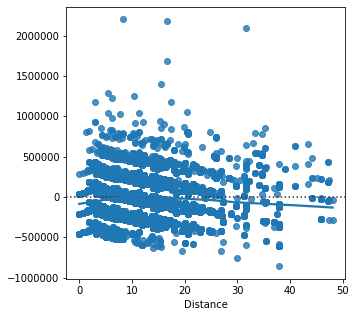

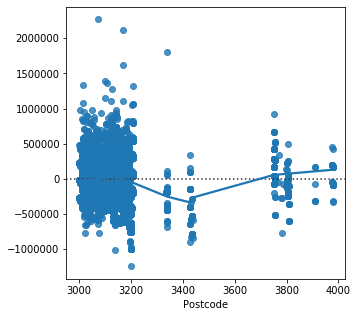

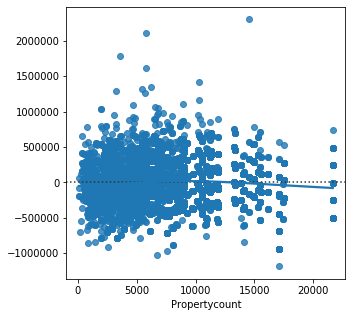

In [62]:
for i in X_test.columns:
    plt.figure(figsize=(5,5))
    sns.residplot(X_test[i], regressor.predict(X_test), lowess=True)